# Modelo de Leontief
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/csf/src/mip/IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* El modelo de insumo-producto de Leontief analiza las interdependencias entre diferentes sectores productivos.
* El modelo consiste en una tabla (matriz insumo-producto) que muestra los flujos entre insumos y productos.
* Indirectamente, la tabla de flujos exhibe los requisitos tecnológicos de los sectores.
* A través de coeficientes de productos intermedios requeridos por unidad de un sector, la matriz insumo-producto permite calcular la utilización de productos como insumos.

La producción se puede dividir en tres componentes:

* Proporción de la producción de un sector $i$ utilizado para la producción de ese mismo sector $i$.
* Proporción de la producción del sector $j$ utilizados para la producción de un sector $i$.
* Proporción de la producción de un sector $i$ utilizado para la demanda final (interna o externa).

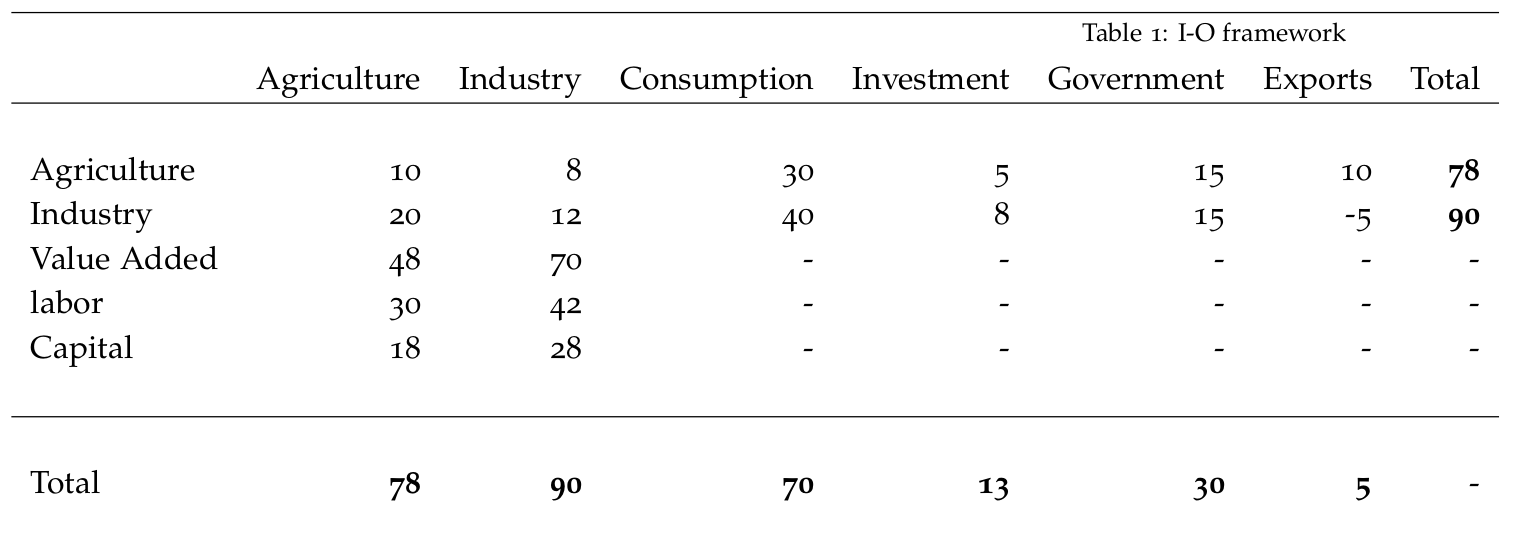

Principales balances del modelo IO:
* Balance de relaciones por filas: 

$$
\begin{equation}
    \text{Demanda intermedia} + \text{Demanda final} = \text{Producto total}
\end{equation}
$$

* Balance de relaciones por columnas: 

$$
\begin{equation}
    \text{Insumos intermedios} + \text{Factores de la producción} = \text{Producto total}
\end{equation}
$$

Para calcular la matriz de coeficientes técnicos, tenemos que dividir el insumo de $i$ consumido por cada actividad $j$ entre el total producido de la actividad $j$.

Usando notación de álgebra lineal, tenemos :

$$
Z=\begin{bmatrix}
10 & 8\\
20 & 12 
\end{bmatrix}
$$

$$
X = \begin{bmatrix}
78 \\
90
\end{bmatrix}
$$

Donde $Z$ es la matriz de flujo entre sectores y $X$ es el vector de producto total.


Las entradas de la matriz de coeficientes técnicos $A$ definen los coeficientes técnicos como la proporción de insumo ofrecido por el sector $i$ y comprado por el sector $j$ con respecto al producto total del sector $j$, $a_{ij}= \dfrac{z_{ij}}{x_j}$ 

La matriz de coeficientes técnicos se calcularía como:

$$
A= Z \cdot (X \cdot I)^{-1}
$$

In [1]:
### La matriz Z
import numpy as np

Z = np.array([[10,8],[20,12]])

X = np.array([78,90])

A = Z.dot(np.linalg.inv(X*np.identity(2)))
A

array([[0.12820513, 0.08888889],
       [0.25641026, 0.13333333]])

En términos matriciales, la producción se define como :

$$
A \cdot X + \mathbf{f} = X
$$

Dicha expresión muestra el balance entre oferta y demanda de los sectores. 

Reordenando términos:

$$
\mathbf{f} = X - A \cdot X  
$$

$$
\mathbf{f} = ( I - A) \cdot X  
$$

Premultiplicando por $( I - A)^{-1}$

$$
( I - A)^{-1}\mathbf{f} = ( I - A)^{-1}( I - A) \cdot X  
$$

$$
X = (I-A)^{-1} \cdot \mathbf{f}= L \cdot \mathbf{f}
$$

Donde $\mathbf{f}$ es el vector de demanda final, y $L=(I-A)^{-1}$ es una matriz conocida como la *inversa de Leontief* o matriz de requerimientos totales.



In [2]:
L = np.linalg.inv(np.identity(2)-A)
L

array([[1.18273717, 0.12130638],
       [0.34992224, 1.18973561]])

Cada entrada $a_{ij}$ de la inversa de Leontief representa la cantidad de producción que debería realizar un sector $i$ para satisfacer una unidad de demanda final de un producto $j$.

Ahora obtengamos la producción total:

In [3]:
f = np.array([60,58])
L.dot(f)

array([78., 90.])

## MIP de México 2018

In [4]:
import pandas as pd

mip = pd.read_excel("datos/mip_pcr_ixi_t_2016.xlsx", index_col=None, na_values=['-'],header =0, skiprows=4, nrows=258,usecols = "B:IY")## Obtenemos el vector de producción total

In [5]:
mip

,"1111 - Cultivo de semillas oleaginosas, leguminosas y cereales",1112 - Cultivo de hortalizas,1113 - Cultivo de frutales y nueces,"1114 - Cultivo en invernaderos y viveros, y floricultura",1119 - Otros cultivos,1121 - Explotación de bovinos,1122 - Explotación de porcinos,1123 - Explotación avícola,1124 - Explotación de ovinos y caprinos,1125 - Acuicultura,...,"8132 - Asociaciones y organizaciones religiosas, políticas y civiles",8141 - Hogares con empleados domésticos,9311 - Órganos legislativos,9312 - Administración pública en general,9313 - Regulación y fomento del desarrollo económico,9314 - Impartición de justicia y mantenimiento de la seguridad y el orden público,9315 - Regulación y fomento de actividades para mejorar y preservar el medio ambiente,"9316,9321 - Actividades administrativas de instituciones de bienestar social y organismos internacionales",9317 - Relaciones exteriores,9318 - Actividades de seguridad nacional
0,4996.216953,0.000000,0.0,30.427201,0.00000,16014.508897,6249.631142,11261.386321,209.413956,0.0,...,0.0,0,0.0,0.0,0.0,4.296722,0.0,0.0,0.0,1.812728
1,0.000000,1095.054658,0.0,0.000000,0.00000,0.000000,0.000000,0.086036,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,2.881220,0.0,0.0,0.0,4.448474
2,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,3.210516,0.0,0.0,0.0,3.366440
3,0.000000,0.000000,0.0,724.308189,0.00000,0.000000,0.000000,0.092394,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.159396,0.0,0.0,0.0,0.178966
4,1873.815297,4068.025697,0.0,317.301836,3455.15781,35425.743124,0.000000,0.000000,442.905974,0.0,...,0.0,0,0.0,0.0,0.0,0.382350,0.0,0.0,0.0,0.213295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
254,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
255,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
256,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [6]:
import re

ramas_dict = {re.findall(r'^\D*(\d+)', rama)[0]:rama[7:] for rama in mip.columns}
ramas_dict

{'1111': 'Cultivo de semillas oleaginosas, leguminosas y cereales',
 '1112': 'Cultivo de hortalizas',
 '1113': 'Cultivo de frutales y nueces',
 '1114': 'Cultivo en invernaderos y viveros, y floricultura',
 '1119': 'Otros cultivos',
 '1121': 'Explotación de bovinos',
 '1122': 'Explotación de porcinos',
 '1123': 'Explotación avícola',
 '1124': 'Explotación de ovinos y caprinos',
 '1125': 'Acuicultura',
 '1129': 'Explotación de otros animales',
 '1131': 'Silvicultura',
 '1132': 'Viveros forestales y recolección de productos forestales',
 '1133': 'Tala de árboles',
 '1141': 'Pesca',
 '1142': 'Caza y captura',
 '1151': 'Servicios relacionados con la agricultura',
 '1152': 'Servicios relacionados con la cría y explotación de animales',
 '1153': 'Servicios relacionados con el aprovechamiento forestal',
 '2111': 'Extracción de petróleo y gas',
 '2121': 'Minería de carbón mineral',
 '2122': 'Minería de minerales metálicos',
 '2123': 'Minería de minerales no metálicos',
 '2131': 'Servicios relac

In [7]:
## Convertimos el data frame en la matriz Z
Z = mip.to_numpy()
Z

array([[4.99621695e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.81272819e+00],
       [0.00000000e+00, 1.09505466e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.44847408e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.36644048e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [8]:
## Obtenemos el vector de producción total
mip_vbp = pd.read_excel("datos/mip_pcr_ixi_t_2016.xlsx", index_col=None, na_values=['-'],header =0, skiprows=4, nrows=258,usecols = "JH")
X = mip_vbp.to_numpy()
X

array([[1.75833582e+05],
       [9.44294370e+04],
       [1.22131536e+05],
       [6.09531640e+04],
       [1.04454533e+05],
       [2.09668269e+05],
       [5.22210350e+04],
       [1.54061724e+05],
       [7.23844500e+03],
       [1.19832790e+04],
       [2.85080300e+03],
       [1.85256000e+02],
       [9.97829000e+03],
       [1.64453740e+04],
       [3.09219480e+04],
       [5.25178000e+02],
       [2.56676200e+03],
       [1.87911000e+02],
       [1.19862400e+03],
       [5.37596747e+05],
       [1.47670640e+04],
       [2.21985146e+05],
       [8.85866490e+04],
       [1.68831477e+05],
       [3.75794355e+05],
       [1.11311882e+05],
       [2.76325600e+03],
       [1.16171005e+06],
       [5.52612443e+05],
       [2.24702726e+05],
       [1.02085589e+05],
       [1.95135162e+05],
       [5.46392100e+04],
       [2.52508751e+05],
       [1.03925773e+05],
       [1.91077110e+05],
       [1.39715198e+05],
       [9.52338120e+04],
       [1.99052011e+05],
       [5.89100972e+05],


In [9]:
## Calculamos la matriz de coefientes técnicos A
A = Z.dot(np.linalg.inv(X*np.identity(X.shape[0])))
A

array([[2.84144638e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.45112851e-05],
       [0.00000000e+00, 1.15965391e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.01512223e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.55202179e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [10]:
## Calculamos la inversa de Leontief
L = np.linalg.inv(np.identity(A.shape[0])-A)
L

array([[1.03000477e+00, 8.73129658e-04, 1.29835520e-03, ...,
        9.56502281e-04, 8.44828655e-04, 5.47709243e-03],
       [1.82494548e-05, 1.01175681e+00, 1.93351959e-05, ...,
        8.51606348e-05, 1.13415134e-04, 2.84855265e-04],
       [9.73348672e-05, 1.06803830e-04, 1.00008127e+00, ...,
        1.32706385e-04, 1.46828569e-04, 4.50072461e-04],
       ...,
       [1.49199176e-05, 1.25243899e-05, 1.17803979e-05, ...,
        1.00001892e+00, 1.61753931e-05, 4.04158854e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# APLICACIONES

## Simulación de la entrada de una nueva actividad económica

# Garrett-Peltier, H. (2017).
<p align="center">
  <img width="1000" height="600" src="imgs/green_versus.png">
</p>


* **“synthetic industry” approach.**
*  I treat clean energy spending as a demand shock.
*  I treat additional spending as investments in the industry, and simulate the effects of expanding the clean energy sector by creating vectors of demand that include the manufacturing, construction, and service industries that comprise the clean energy sector. 
* In essence, what the “synthetic industry” approach does is use existing data in the national accounts, in existing I-O tables.
*  While “wind” or “solar” are not identified as industries as such, the activities and materials making up the wind and solar industries are already implicitly captured in existing I-O tables. 

* For example, in generating the demand vector for the wind energy industry, I rely on data from a survey conducted by the European Wind Energy Association (EWEA, 2004), as previously presented in Garrett-Peltier (2011). 

* The EWEA publication shows that wind turbine manufacturing, the various components and their shares of total costs are as follows:
    * 37% machinery
    * 26% construction
    * 12% fabricated metal products
    * 12% plastic products
    * 7% scientific/technical services
    * 3% mechanical power transmission equipment
    * 3% electronic connector equipment
    
* **In order to generate a vector of demand for wind energy, we map this survey data into the industrial categories of our I-O table**


<p align="center">
  <img width="1000" height="600" src="imgs/Table-1-Garrett-Peltier-2011.png">
</p>


<p align="center">
  <img width="1000" height="600" src="imgs/Table-2-Garrett-Peltier-2011.png">
</p>

# New Industry: The Final-Demand Approach (Miller y Blair, 2009, cap 13)

Consideremos una economía con dos sectores:

$$
A=\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22} 
\end{bmatrix}
$$

Pensemos que se incorpora una nueva industria (sector 3). 

Asumamos que es posible estimar los insumos de los sectores 1 y 2 del valor de la producción del nuevo sector 3; esto es, $a_{13}$ y $a_{23}$.



Para cuantificar el impacto de la entrada del sector 3 en la economía, 
debemos tener alguna medida de la **magnitud** de la nueva actividad económica asociada con el sector 3.

En términos de IO, esto significa que debemos especificar:
* El nivel de producción (producto bruto) del sector 3, $x_3$, o
* La demanda final, $f_3$


Para el ejemplo, se define el nivel de producción de sector 3, que se denota como $\bar{x}_3$. 

Pensemos que una nueva empresa planea construir una planta de 2.5 millones con una producción anual planificada de 850,000. 

La nueva demanda de los sectores 1 y 2 que surge por la producción del nuevo sector 3 es $a_{13}\bar{x}_3$  y $a_{23}\bar{x}_3$ , respectivamente.

Es decir, podemos ver esas nuevas demandas como un cambio **exógeno** impuesto a los dos sectores originales;

$$
\Delta \mathbf{f}= \begin{bmatrix}
a_{13}\bar{x}_3 \\
a_{23}\bar{x}_3
\end{bmatrix}
$$

de manera que los impactos, en términos del producto de esos dos sectores, estarían dados por $\Delta\mathbf{x} = \mathbf{L}\Delta \mathbf{f}$:

$$
\Delta\mathbf{x}=\begin{bmatrix}
l_{11} & l_{12}\\
l_{21} & l_{22} 
\end{bmatrix}
\begin{bmatrix}
a_{13}\bar{x}_3 \\
a_{23}\bar{x}_3
\end{bmatrix} 
= \begin{bmatrix}
l_{11}a_{13}\bar{x}_3 + l_{12}a_{23}\bar{x}_3 \\
l_{21}a_{13}\bar{x}_3 + l_{22}a_{23}\bar{x}_3 \\
\end{bmatrix}
$$


Dado que también hay una demanda usual, independiente de la demanda del nuevo sector 3, $\bar{f}_1$ y $\bar{f}_2$, para esos dos sectores, el producto bruto total en los dos sectores sería 

$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} =\begin{bmatrix}
l_{11} & l_{12}\\
l_{21} & l_{22} 
\end{bmatrix}
\begin{bmatrix}
\bar{f}_1 + a_{13}\bar{x}_3 \\
\bar{f}_2 + a_{23}\bar{x}_3
\end{bmatrix} 
= \begin{bmatrix}
l_{11}(\bar{f}_1 + a_{13}\bar{x}_3) + l_{12}(\bar{f}_2 + a_{23}\bar{x}_3) \\
l_{21}(\bar{f}_1+a_{13}\bar{x}_3) + l_{22}(\bar{f}_2 + a_{23}\bar{x}_3) \\
\end{bmatrix}
$$

cuando $\bar{f}_1 = 0$ y $\bar{f}_2=0$, aislamos el impacto de incoporar el nuevo sector. 

## Ejemplo 1

Sea 
$$
\mathbf{A}=\begin{bmatrix}
    0.15 & 0.25\\
    0.20& 0.05 
\end{bmatrix}
$$, 

entonces $(\mathbf{I} - \mathbf{A})^{-1}$ es igual a:
$$
\mathbf{A}=\begin{bmatrix}
    1.25412541 & 0.330033\\
    0.2640264  & 1.12211221 
\end{bmatrix}
$$

In [11]:
import numpy as np

A= np.array([[0.15,0.25],[0.20,0.05]])
L = np.linalg.inv(np.identity(2)-A)
L

array([[1.25412541, 0.330033  ],
       [0.2640264 , 1.12211221]])

Asumamos que las estimaciones de las estimaciones de insumos directos del sector 3 son:
* $a_{13}=0.30$
* $a_{23} = 0.18$

y que se espera que el sector 3 produzca un nivel de 100,000 por año.

De manera que $\bar{x}_3 = 100000$

$$
\Delta \mathbf{f}= \begin{bmatrix}
0.30 \times 100000  \\
0.18 \times 100000
\end{bmatrix}
= 
 \begin{bmatrix}
30000  \\
18000
\end{bmatrix}
$$

El impacto de incoporar el nuevo sector es igual a 

$$
 \Delta \mathbf{x} = \begin{bmatrix}
43564  \\
28118
\end{bmatrix}
$$

In [12]:
x_bar_3 = 100000
delta_f = np.array([x_bar_3 * 0.30 ,x_bar_3 * 0.18])
L@delta_f

array([43564.35643564, 28118.81188119])

El sector 1, al satisfacer la nueva demanda de su producto por un valor de 30,000, finalmente tendrá que aumentar su producción en 43,560. De manera similar, las nuevas demandas del sector 2 del sector 3 son de 18,000, pero al final el sector 2 necesitará producir un total de 28,116 más de producción. Estas cifras representan una forma de medir el impacto en una economía que surge del movimiento de nueva actividad industrial.

## Impactos en el empleo

Sea $\mathscr{E}$ el empleo total y $E = [e_1,e_2,\dots,e_n]$ un vector fila de los coeficientes de trabajo o razones empleo/producto(bruto) de cada sector, la expresión de empleo total sería:

$$
\begin{equation}
\mathscr{E} = EX
\end{equation}
$$

Suponiendo una economía con dos sectores, el **impacto** (cambio directo más el indirecto) en el empleo por el incremento exógeno en la demanda final del sector 2 sería igual a 

$$
\Delta\mathscr{E}_{d} = 
\begin{bmatrix}
    e_1 & e_2\\
\end{bmatrix}
\begin{bmatrix}
    l_{11} & l_{12}\\
    l_{12} & l_{22}
\end{bmatrix}
\begin{bmatrix}
    \Delta f_{1} \\
    \Delta f_{2} 
\end{bmatrix}
=
E (\mathbf{I} - \mathbf{A})^{-1} \Delta \mathbf{f}
= E \Delta X
$$

El cambio directo en el empleo debido al incremento en la demanda es $\Delta\mathscr{E}_{d'}$

$$
\Delta\mathscr{E}_{d'} = 
\begin{bmatrix}
    e_1 & e_2\\
\end{bmatrix}
\begin{bmatrix}
    \Delta f_{1} \\
    \Delta f_{2} 
\end{bmatrix}
=
E\Delta \mathbf{f}
$$

## Ejemplo 2

Continuando con el ejemplo anterior, calculamos el impacto en el empleo debido a la incorporación del nuevo sector. 

Los  coeficientes de trabajo están dados por:

$$
E = \begin{bmatrix}
    0.25 & 0.15\\
\end{bmatrix}
$$

El cambio en el empleo igual al trabajo requerido por el cambio en la demanda final; es decir

$$
\Delta\mathscr{E}_{d} = 
E \Delta X
=
E (\mathbf{I} - \mathbf{A})^{-1} \Delta \mathbf{f} 
$$

$$
\Delta\mathscr{E}_{d} =
\begin{bmatrix}
0.25 & 0.15  
\end{bmatrix}
\begin{bmatrix}
43564  \\
28118
\end{bmatrix}
=
15108
$$


In [13]:
E = np.array([0.25,0.15])

E.dot(L@delta_f)

15108.910891089108

Para calcular el cambio porcentual en el empleo, tenemos que calcular $X$. Suponemos que $\bar{f}_1 = 120000$ y $\bar{f}_2=90000$. Recordando la expresión para calcular $X$;
$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} =\begin{bmatrix}
l_{11} & l_{12}\\
l_{21} & l_{22} 
\end{bmatrix}
\begin{bmatrix}
\bar{f}_1  \\
\bar{f}_2 
\end{bmatrix} 
$$

In [14]:
x_bar_3 = 100000
f1_usual = 120000
f2_usual = 90000
X = np.array([f1_usual ,f2_usual])
(E.dot(L@delta_f)/sum(L@X))*100

4.829113924050633